The optimal target function $f:\mathcal{X} \rightarrow \mathcal{Y}$ is assumed the be roughly a linear function. 

Using the hotel dataset, we will take the lead time variable as feature measurements and the ADR or Average Daily Rate, a metric that calculates the average revenue generated per occupied room.

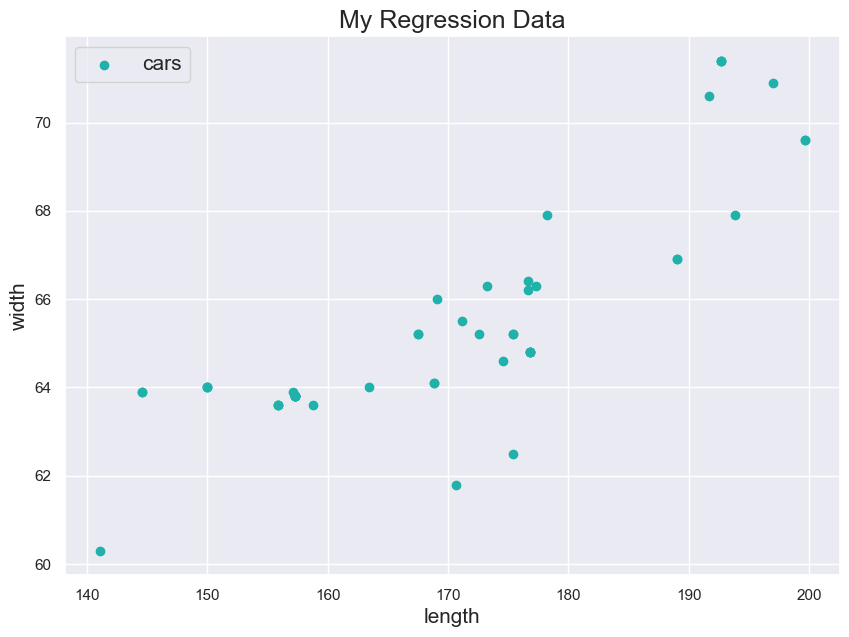

In [125]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_theme()

df = pd.read_csv("Datasets/CarPrice_Assignment.csv")
 
df = df.iloc[:50][["carlength", "carwidth"]]
plt.figure(figsize = (10, 7))
plt.scatter(df.carlength, 
            df.carwidth, 
            color = "lightseagreen",
            label = "cars")
plt.xlabel("length", fontsize = 15)
plt.ylabel("width", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("My Regression Data", fontsize = 18)
plt.show()


In [126]:
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    def __init__(self, activation_function):
        self.activation_function = activation_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                error = (self.predict(xi) - target)
                self.w_[:-1] -= alpha*error*xi
                self.w_[-1] -= alpha*error
                errors += .5*(error**2)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)


#### Formatting ####
Now we convert both the lead time and the ADR columns of the data into instances of ```numpy.ndarray```


In [127]:
X = df.carlength.values
X = X.reshape(-1, 1)
y = df.carwidth.values

# Scale features
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# Scale labels
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

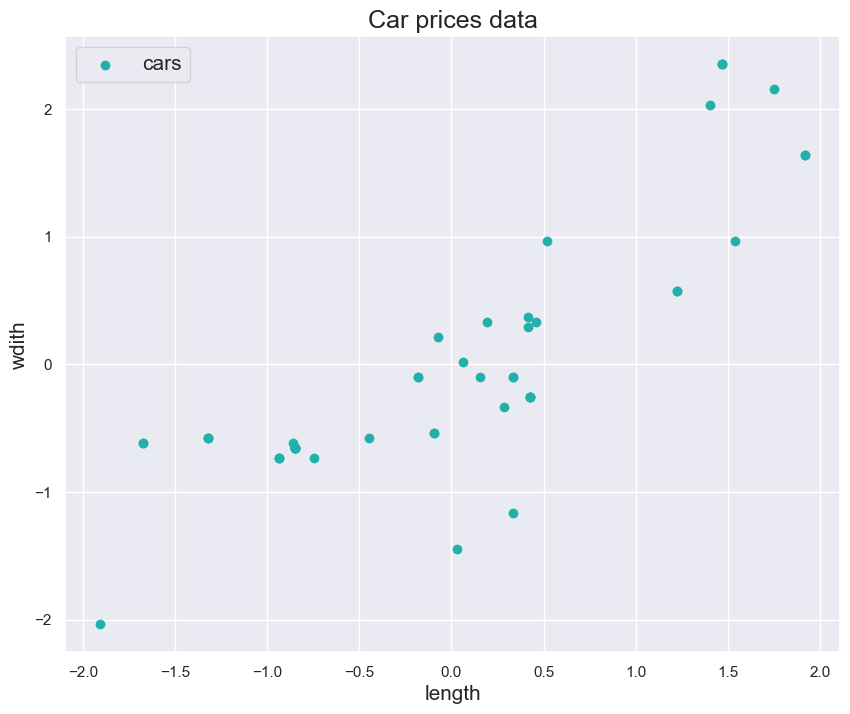

In [128]:
plt.figure(figsize = (10, 8))
plt.scatter(X_scaled, y_scaled, color = "lightseagreen", label = "cars")
plt.xlabel("length", fontsize = 15)
plt.ylabel("wdith", fontsize = 15)
plt.title("Car prices data", fontsize = 18)
plt.legend(fontsize = 15)
plt.show()

### Create and Train a ```SingleNeuron```

In [129]:
def linear_activation(z):
    return z

node = SingleNeuron(linear_activation)
node.train(X_scaled, y_scaled, alpha = 0.0001, epochs = 10)

So far, we have created an instance of ```SingleNeuron``` and called the train method. We can visualize the linear regression line by scatter plotting the data and also plotting the predicted output over some domain within the range of values of input features.

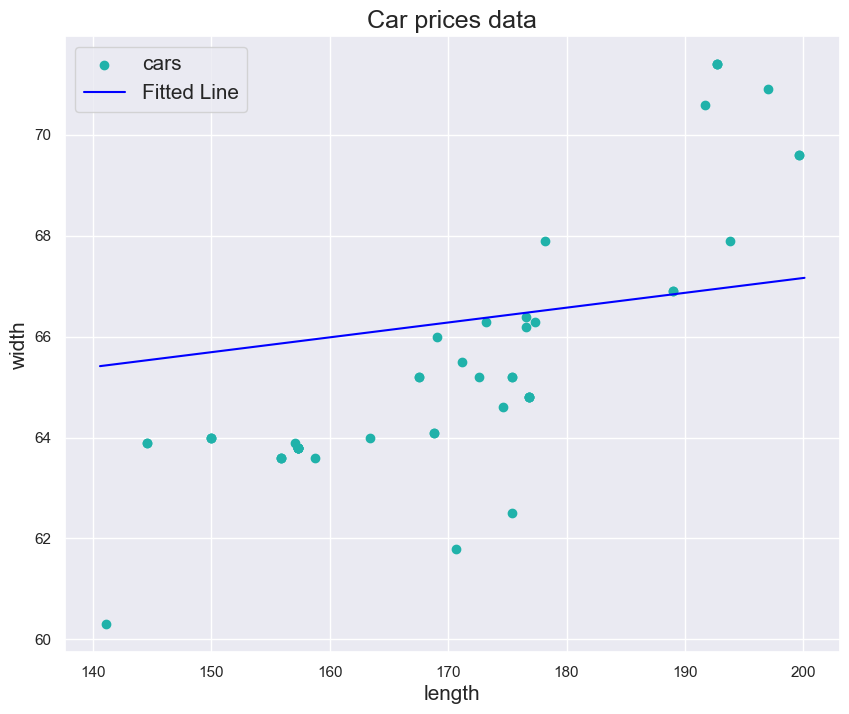

In [130]:
domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100).reshape(-1,1)

# Scale domain using the scaler i fit earlier
domain_scaled = scaler_X.transform(domain)

#Predict on the scaled domain
y_pred_scaled = node.predict(domain_scaled)

# Inverse-transform the predictions back to original width units
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1,1)).flatten()


plt.figure(figsize = (10, 8))
plt.scatter(X, y, color = "lightseagreen", label = "cars")
plt.plot(domain, y_pred, color='blue', label='Fitted Line')
plt.xlabel("length", fontsize = 15)
plt.ylabel("width", fontsize = 15)
plt.title("Car prices data", fontsize = 18)
plt.legend(fontsize = 15)
plt.show()

We can visualize the mean squared errror at each of our epochs of our training process:

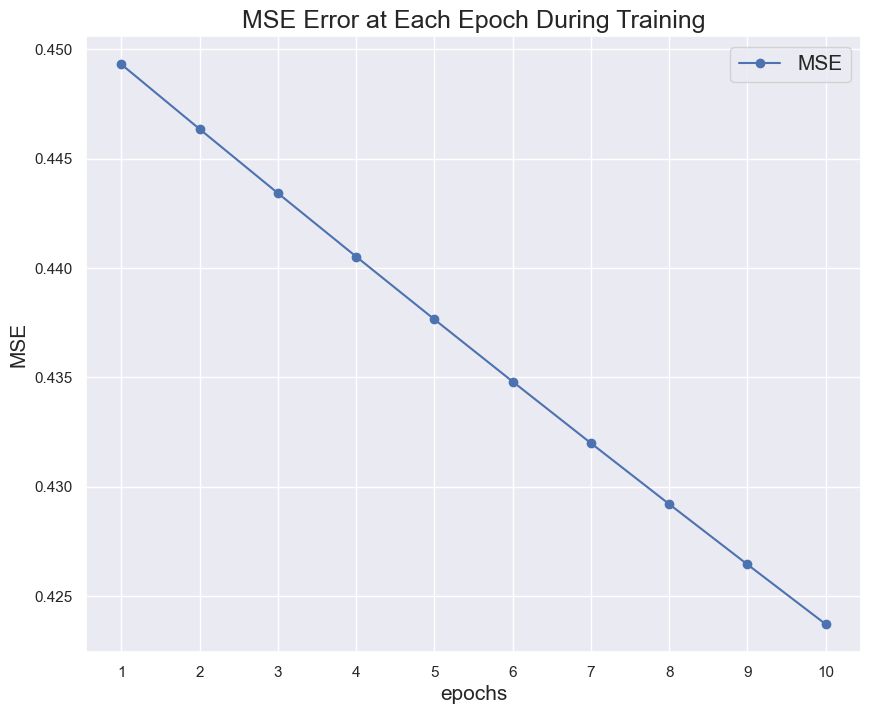

In [131]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         marker = "o",
         label = "MSE")
plt.xlabel("epochs", fontsize = 15)
plt.ylabel("MSE", fontsize = 15)
plt.xticks(range(1, len(node.errors_) + 1))
plt.legend(fontsize = 15)
plt.title("MSE Error at Each Epoch During Training", fontsize = 18)
plt.show()

Let's observe what happens when we train a single neuron over 10 times more epochs than before. 

Text(0.5, 1.0, 'MSE Error at Each Epoch During Training')

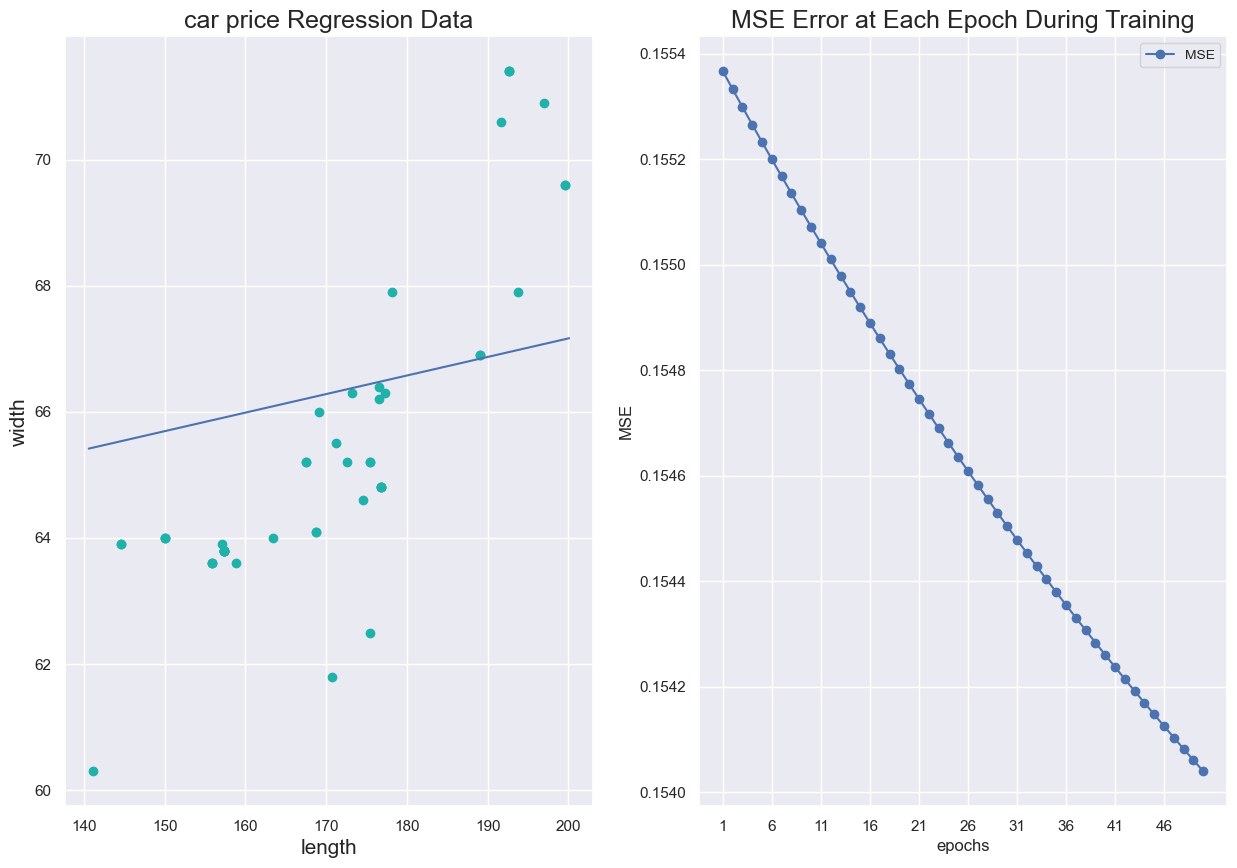

In [133]:
node = SingleNeuron(linear_activation)
node.train(X_scaled, y_scaled, alpha = .0001, epochs = 50)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.scatter(X, y, color = "lightseagreen")
ax1.plot(domain, y_pred)
ax1.set_xlabel("length", fontsize = 15)
ax1.set_ylabel("width", fontsize = 15)
ax1.set_title("car price Regression Data", fontsize = 18)

ax2.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         marker = "o",
         label = "MSE")
ax2.set_xlabel("epochs")
ax2.set_ylabel("MSE")
ax2.set_xticks(range(1, len(node.errors_) + 1, 5))
ax2.legend(fontsize = 10)
ax2.set_title("MSE Error at Each Epoch During Training", fontsize = 18)

## Experiment with the Learning Rate ##
We can observe the effect of changing the learning rate while keeping the number of epochs fixed.


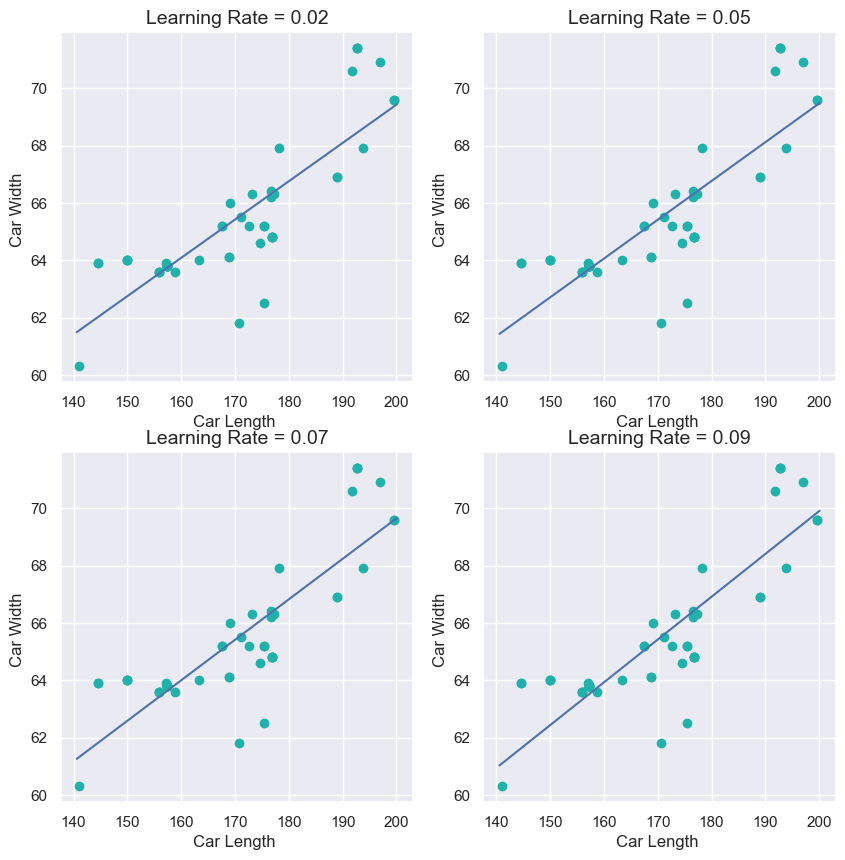

In [141]:
#different choices for learning rate
alphas = [0.02, 0.05, 0.07, 0.09]

# set up domain
domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100).reshape(-1,1)

domain_scaled = scaler_X.transform(domain)



# Call the subplots method for plotting a grid of figures
fig, axs = plt.subplots(2, 2, figsize=(10,10))

# Loop over the axs and alpha values
for ax, alpha in zip(axs.flat, alphas):
    node = SingleNeuron(linear_activation)
    node.train(X_scaled, y_scaled, alpha = alpha, epochs = 1_000)
    y_pred_scaled = node.predict(domain_scaled)
    
    # Inverse-transform predictions
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1,1)).flatten()

    ax.plot(domain, y_pred)
    ax.scatter(X, y, color = "lightseagreen")
    ax.set_title(f"alpha = {alpha}", fontsize = 18)
    ax.set_xlabel("Car Length ", fontsize=12)
    ax.set_ylabel("Car Width ", fontsize=12)
    ax.set_title(f"Learning Rate = {alpha}", fontsize=14)




The clean, low-noise nature of the data allows for rapid convergence for all tested alphas.

### Summary ###
I implemented linear regression using a custom single neuron model, with car length as the input feature and car width as the target. 

Linear regression aims to find the best fit straight line that minimizes the mean squared error between predicted and true labels.
To train the neuron efficiently, I applied (through the train function) stochastic gradient descent (SGD) to update the weights based on the gradient of the MSE loss with respect to each parameter.

Initially, when training the model on the data, I observed distorted results as the lines were either exploding to very large values or completely failing to align with data. I had to apply a process of scaling the features and targets to ensure stable and efficient gradient updates. I realized that the issue was being caused due to a mismatch in scales.

Once the data was scaled, I trained the neuron using different learning rates (α = 0.02, 0.05, 0.07, 0.09) to explore the impact of learning rate choice on model performance. Despite varying the learning rates, the resulting regression lines were very similar.